In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# use api call to create weather url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | iquique
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | salina
Processing Record 10 of Set 1 | atambua
Processing Record 11 of Set 1 | ratnagiri
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | cape canaveral
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | bandarbeyla
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | 

Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | mattru
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | uzunkopru
City not found. Skipping...
Processing Record 44 of Set 4 | ilave
Processing Record 45 of Set 4 | vao
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | bucerias
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | marrakesh
Processing Record 4 of Set 5 | launceston
Processing Record 5 of Set 5 | camapua
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | ambilobe
Processing Record 8 of Set 5 | udachnyy
Processing Record 9 of Set 5 | catamarca
Processing Record 10 of Set 5 | codrington
Processing Record 11 of Set 5 | kloulklubed
Pr

Processing Record 27 of Set 8 | gat
Processing Record 28 of Set 8 | hofn
Processing Record 29 of Set 8 | byron bay
Processing Record 30 of Set 8 | vanimo
Processing Record 31 of Set 8 | maragogi
Processing Record 32 of Set 8 | wenling
Processing Record 33 of Set 8 | tutoia
Processing Record 34 of Set 8 | purwakarta
Processing Record 35 of Set 8 | garowe
Processing Record 36 of Set 8 | acapulco
Processing Record 37 of Set 8 | myrtle grove
Processing Record 38 of Set 8 | dalhousie
Processing Record 39 of Set 8 | coihaique
Processing Record 40 of Set 8 | sivas
Processing Record 41 of Set 8 | yinchuan
Processing Record 42 of Set 8 | moree
Processing Record 43 of Set 8 | warrnambool
Processing Record 44 of Set 8 | hualmay
Processing Record 45 of Set 8 | karera
Processing Record 46 of Set 8 | biak
Processing Record 47 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 48 of Set 8 | touros
Processing Record 49 of Set 8 | nanao
Processing Record 50 of Set 8 | camacha
Processing 

Processing Record 19 of Set 12 | belle fourche
Processing Record 20 of Set 12 | akdepe
Processing Record 21 of Set 12 | yuxia
Processing Record 22 of Set 12 | marawi
Processing Record 23 of Set 12 | shelbyville
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | cambyreta
City not found. Skipping...
Processing Record 26 of Set 12 | mezen
Processing Record 27 of Set 12 | barbar
City not found. Skipping...
Processing Record 28 of Set 12 | englewood
Processing Record 29 of Set 12 | kununurra
Processing Record 30 of Set 12 | kotturu
Processing Record 31 of Set 12 | mecca
Processing Record 32 of Set 12 | balsa
Processing Record 33 of Set 12 | saint anthony
Processing Record 34 of Set 12 | pacifica
Processing Record 35 of Set 12 | henties bay
Processing Record 36 of Set 12 | hobyo
Processing Record 37 of Set 12 | gambela
Processing Record 38 of Set 12 | vysotsk
Processing Record 39 of Set 12 | salalah
-----------------------------
Data Retrieval Complete      
---

In [7]:
#create city data dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pisco,PE,2021-07-12 16:03:57,-13.7000,-76.2167,68.02,78,64,7.92
1,Rikitea,PF,2021-07-12 16:01:16,-23.1203,-134.9692,73.81,75,24,12.82
2,Ushuaia,AR,2021-07-12 16:01:24,-54.8000,-68.3000,35.26,87,90,8.05
3,Punta Arenas,CL,2021-07-12 16:03:58,-53.1500,-70.9167,35.11,71,37,25.64
4,Iquique,CL,2021-07-12 16:03:58,-20.2208,-70.1431,66.52,63,75,6.93
5,Salina,US,2021-07-12 16:01:17,38.8403,-97.6114,79.30,47,1,4.61
6,Atambua,ID,2021-07-12 16:03:59,-9.1061,124.8925,67.12,83,29,6.85
7,Ratnagiri,IN,2021-07-12 16:03:59,16.9833,73.3000,78.87,88,100,15.35
8,Kapaa,US,2021-07-12 16:01:22,22.0752,-159.3190,75.52,84,90,1.01
9,Ponta Do Sol,PT,2021-07-12 16:02:58,32.6667,-17.1000,75.83,69,100,10.60


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

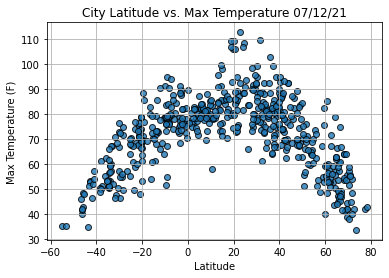

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

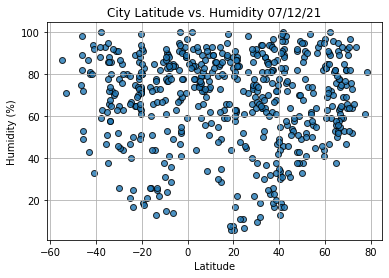

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

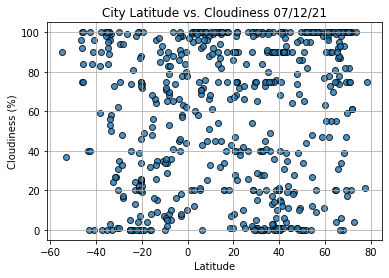

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

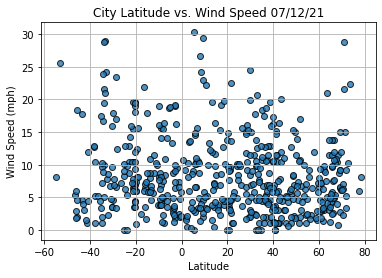

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()